In [0]:
%%bash
apt-get install libgeos-3* libgeos-dev
pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists...
Building dependency tree...
Reading state information...
libgeos-3.6.2 is already the newest version (3.6.2-1build2).
libgeos-3.6.2 set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev
0 upgraded, 1 newly installed, 0 to remove and 7 not upgraded.
Need to get 73.1 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Fetched 73.1 kB in 0s (936 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 135004 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb ...
Unpacking libgeos-dev (3.6.2-1build2) ...
Setting up libgeos-dev (3.6.2-1build2) ...
Processing t

**1) Import libraries**

- matplotlib (2D plotting)
- pylab (scientific computing)
- basemap (plotting 2D data on maps)
- scikit-learn (machine learning)
- pandas (data structures and data analysis tools)

In [0]:
from google.colab import auth
auth.authenticate_user()

KeyboardInterrupt: ignored

In [0]:
%matplotlib inline
%pylab inline
from mpl_toolkits.basemap import Basemap
import sklearn
import pandas as pd
from scipy.stats.mstats import zscore
import warnings
from sklearn.mixture import GaussianMixture as GMM
from sklearn.linear_model import LinearRegression

import numpy as np
import seaborn as sns 
from scipy import stats

warnings.filterwarnings("ignore") # disable warnings
pylab.rcParams['figure.figsize']=(15,15) # graph size

Populating the interactive namespace from numpy and matplotlib


**2) Declare function**
- plot_im (plot satellite image with geographic coordinates)
- plot_ts (plot time series)
- définiton d'une gaussienne 


In [0]:
# function to plot images  
def plot_im(lon,lat,im,size_points,var_name):
    
    # transform to arrays (just in case)
    lon=array(lon)
    lat=array(lat)
    im=array(im)
    
    if max(lon)-min(lon)<100:
      m=Basemap(projection='merc',llcrnrlat=20,urcrnrlat=32,\
                llcrnrlon=260,urcrnrlon=280,lat_0=(32+20)*0.5,\
                lon_0=(260+280)*0.5,resolution='l')
      # Mercator projection (for small zone)
      #m=Basemap(projection='merc',llcrnrlat=nanmin(lat-4),urcrnrlat=nanmax(lat+4),\
                #llcrnrlon=nanmin(lon-10),urcrnrlon=nanmax(lon+10),lat_0=(nanmax(lat)+nanmin(lat))*0.5,\
                #lon_0=(nanmax(lon)+nanmin(lon))*0.5,resolution='l')
  
    else:
      # Orthogonal projection (for large zone)
      m=Basemap(projection='ortho',lat_0=0,lon_0=0,resolution='l')
    # you can use other projections (see https://matplotlib.org/basemap/users/mapsetup.html)
    
    # transform (lon,lat) to (x,y)
    x,y=m(lon,lat)

    # plot
    im=ma.masked_where(isnan(im),im)
    res=m.scatter(x,y,size_points,im,'o',alpha=1,cmap='jet',lw=0)
    m.drawcoastlines()
    m.fillcontinents()
    parallels = linspace(nanmin(lat),nanmax(lat),2)
    meridians = linspace(nanmin(lon),nanmax(lon),2)
    m.drawparallels(parallels,labels=[1,0,0,1],fontsize=10)
    m.drawmeridians(meridians,labels=[1,0,0,1],fontsize=10)
    cb=m.colorbar(res,location="right")
    cb.set_label(var_name,fontsize=10)
    
# function to plot time series
def plot_ts(time,ts,line_type,var_name):

    # plot
    plot_date(time,ts,line_type)
    xlabel('Time',fontsize=15)
    ylabel(var_name,fontsize=15)
    grid()

def gaussian(x, mu, sigsq):
    scale = 1/np.sqrt(2*np.pi*sigsq)
    return scale*np.exp(-np.power(x - mu, 2.) / (2 * sigsq))

**2) Data import**


*   Avec Bigquery 




In [0]:
# read dataframe
%%bigquery --project alert-ground-261008 output
SELECT *
FROM bdo2020.bdo2020.1998_2015
WHERE lon>270 AND lon<274 AND lat>24 AND lat<28

In [0]:

%%bigquery --project alert-ground-261008 output_extend
SELECT *
FROM bdo2020.bdo2020.1998_2015
WHERE lon>270 AND lon<300 AND lat>24 AND lat<32

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive




*   Enregistrement des données en Local sur le Drive



In [0]:
import pandas as pd
#output.to_csv(r'/content/drive/My Drive/DS2_Project/Copie de Data.csv')



*   Téléchargement des données depuis le Drive 


In [0]:
Data = pd.read_csv('/content/drive/My Drive/dataHurricanes.csv')

In [0]:
# statistics of the dataset
Data.describe()
Data.head()

,Unnamed: 0,lat,lon,sst,time,ssh
0,0,19.125,265.875,22.20,733837.0,0.2465
1,1,19.125,266.625,22.35,733837.0,0.2867
2,2,19.375,266.875,22.50,733837.0,0.2659
3,3,19.625,266.875,22.35,733837.0,0.2463
4,4,19.875,264.375,22.65,733837.0,0.2029




*   Visualisation des données 



In [0]:
lat = Data.groupby(['lat','lon'])['lat'].mean()
lon = Data.groupby(['lat','lon'])['lon'].mean()
mean_sst = Data.groupby(['lat','lon'])['sst'].mean()

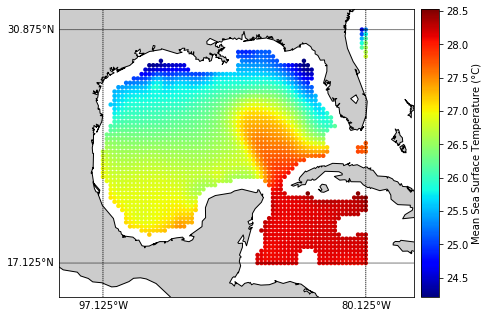

In [0]:
figure()
title ("Gulf of Mexico")
subplot(1,2,1)
plot_im(lon,lat,mean_sst,20,'Mean Sea Surface Temperature (°C)')

###Choix de la méthode de détéction des ouragans 



*   Difference de sst entre deux jours




In [0]:
sst_mean= Data.groupby(['time'])['sst'].mean()

In [0]:
jours = Data.groupby(['time'])['time'].mean()
jour = np.arange(min(jours), max(jours)+1)

In [0]:
difsst = np.diff(sst_mean)

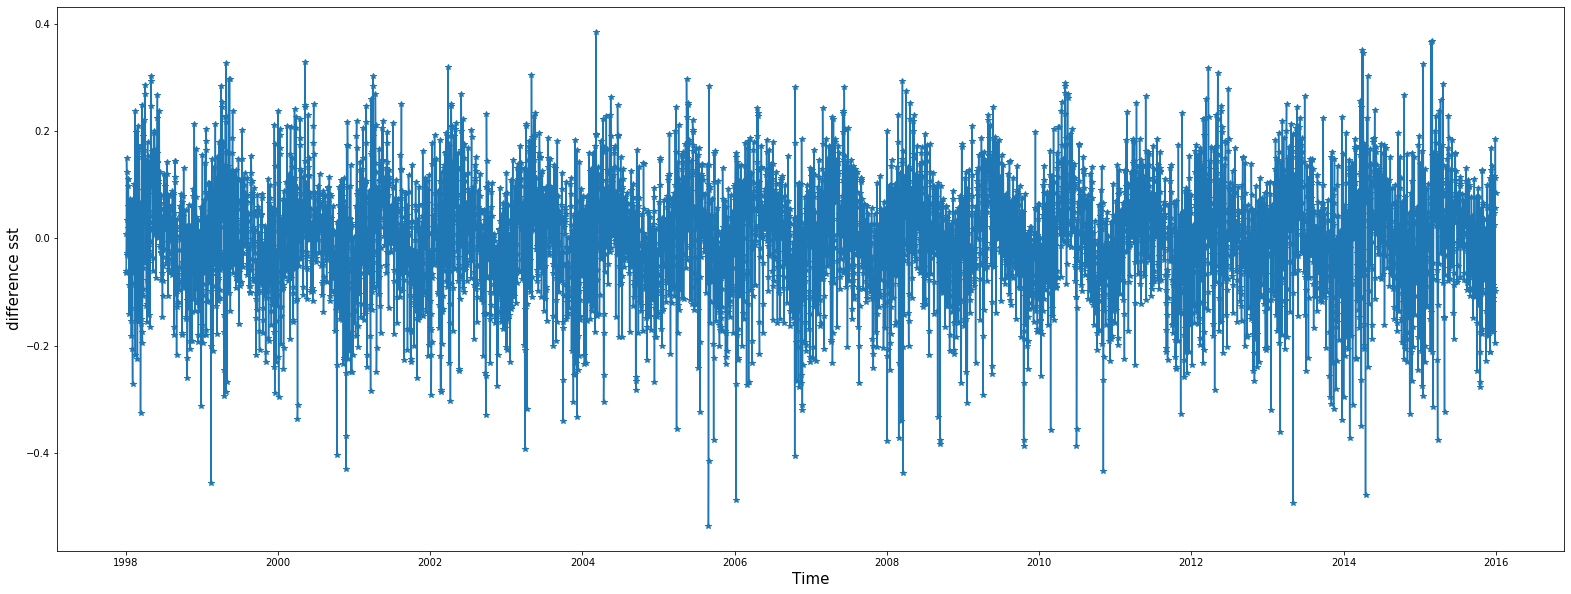

In [0]:
plt.figure(figsize=(27,10))
plot_ts(jour[1:],difsst,'-*', 'difference sst')
grid()



*   Variance de la sst



In [0]:
Data['year']= Data.time.apply(lambda x: datetime.date.fromordinal(int(x)).year)

In [0]:
Data['month']= Data.time.apply(lambda x: datetime.date.fromordinal(int(x)).strftime("%m/%y"))
Data

,Unnamed: 0,lat,lon,sst,time,ssh,year,month
0,0,19.125,265.875,22.20,733837.0,0.2465,2010,03/10
1,1,19.125,266.625,22.35,733837.0,0.2867,2010,03/10
2,2,19.375,266.875,22.50,733837.0,0.2659,2010,03/10
3,3,19.625,266.875,22.35,733837.0,0.2463,2010,03/10
4,4,19.875,264.375,22.65,733837.0,0.2029,2010,03/10
...,...,...,...,...,...,...,...,...
14035485,14035485,27.375,271.125,24.30,730947.0,0.4609,2002,04/02
14035486,14035486,26.625,269.375,23.55,730947.0,0.1133,2002,04/02
14035487,14035487,27.625,271.625,23.55,730947.0,0.1894,2002,04/02
14035488,14035488,27.625,275.125,23.55,730947.0,0.2084,2002,04/02


In [0]:
Data_sort = Data.sort_values(by='time')

In [0]:
Data_sort

,Unnamed: 0,lat,lon,sst,time,ssh,year,month
10502243,10502243,20.625,268.375,23.70,729390.0,0.2602,1998,01/98
677800,677800,27.875,266.125,19.50,729390.0,0.1128,1998,01/98
677801,677801,29.125,272.875,19.50,729390.0,0.1513,1998,01/98
677802,677802,22.875,263.875,22.50,729390.0,0.1337,1998,01/98
677803,677803,22.875,264.375,22.50,729390.0,0.2033,1998,01/98
...,...,...,...,...,...,...,...,...
8073556,8073556,26.375,275.375,27.75,735963.0,0.5989,2015,12/15
8073557,8073557,25.125,269.125,25.20,735963.0,0.3882,2015,12/15
8073558,8073558,25.875,270.875,25.20,735963.0,0.2104,2015,12/15
8073560,8073560,19.375,276.125,28.20,735963.0,0.9510,2015,12/15


In [0]:
annee = np.arange(min(Data.year), max(Data.year)+1)

In [0]:
annee

array([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015])

In [0]:
sst_std_year =  Data.groupby(['year'])['sst'].std()

In [0]:
sst_std =  Data_sort.groupby(['time'])['sst'].std()
sst_std


time
729390.0    2.482682
729391.0    2.472875
729392.0    2.486625
729393.0    2.493092
729394.0    2.417565
              ...   
735959.0    1.500847
735960.0    1.560348
735961.0    1.482935
735962.0    1.436012
735963.0    1.394604
Name: sst, Length: 6574, dtype: float64

*texte en italique*

*   Détermination du modèle à l'aide d'une régression linéaire



In [0]:
t_fit = np.array(jours)
# define a non-linear trend

x1=np.ones(t_fit.shape)
x2 = t_fit
# define a seasonal cycle
x3 = np.sin(2*np.pi*t_fit/365.25)
# define a linear trend
x4 = np.cos(2*np.pi*t_fit/365.25)
x5=x3 *x4


from sklearn.linear_model import LinearRegression
X = np.vstack((x1,x2,x3,x4,x5)).T
y=np.array(sst_std)

# 2: create the model, as before
model = LinearRegression()

# 3: fit the model, as before
model.fit(X,y)
sst_prdit = model.predict(X)

In [0]:
sst_std_tronc=minimum(2.1, sst_std)

In [0]:
diff = sst_std_tronc-sst_prdit
ouragans = []
for i in range(diff.shape[0]):
  if diff.values[i] > 0.5:
    ouragans.append(i)

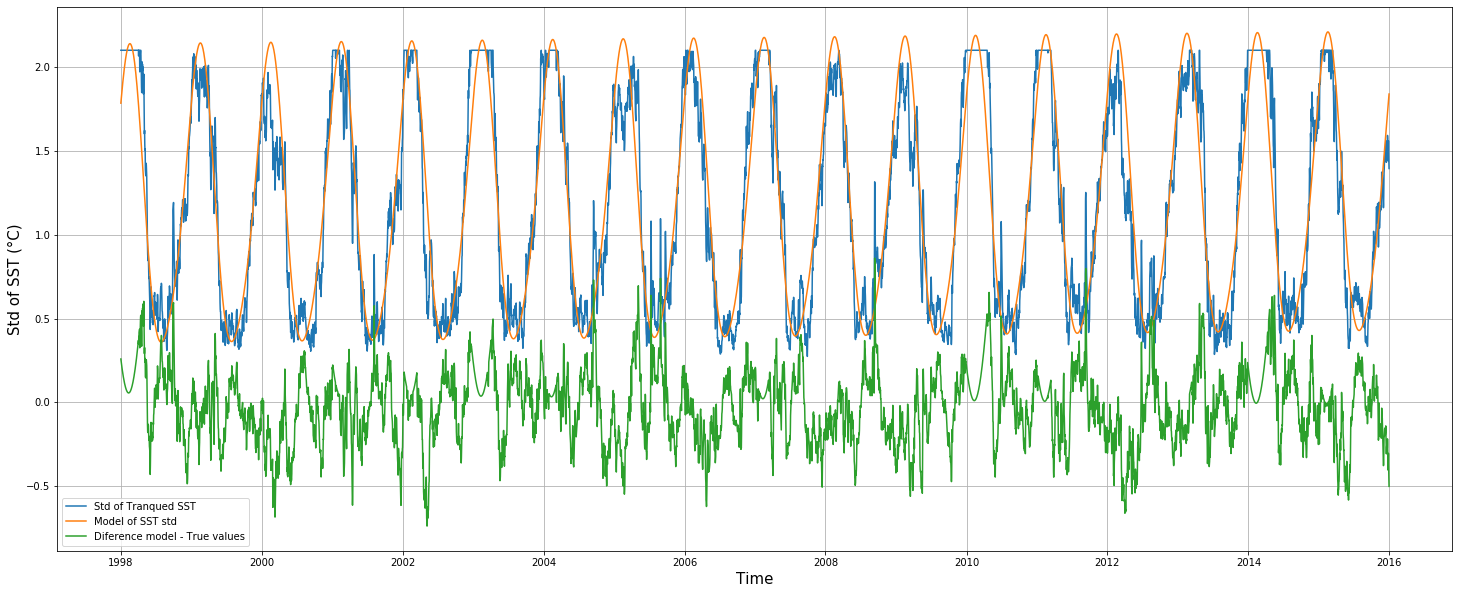

In [0]:
figure(figsize=(25,10))

#plot_ts(jours,sst_std, '-', 'Std of SST (°C)' )
plot_ts(jours,sst_std_tronc, '-', 'Std of SST (°C)' )
plot_ts(jours,sst_prdit, '-', 'Std of SST (°C)')
plot_ts(jours,diff, '-', 'Std of SST (°C)' )
legend(['Std of Tranqued SST','Model of SST std', 'Diference model - True values'])
#grid()


In [0]:
time_ouragans=[]
for i in ouragans:
  time_ouragans.append(datetime.date.fromordinal(int(jours.values[i])).strftime("%d/%m/%y"))

In [0]:
time_ouragans

['13/04/98',
 '14/04/98',
 '15/04/98',
 '21/04/98',
 '22/04/98',
 '23/04/98',
 '24/04/98',
 '25/04/98',
 '26/04/98',
 '29/04/98',
 '30/04/98',
 '01/05/98',
 '28/09/98',
 '29/09/98',
 '30/09/98',
 '01/10/98',
 '06/08/01',
 '16/09/04',
 '17/09/04',
 '02/05/05',
 '03/05/05',
 '04/05/05',
 '05/05/05',
 '06/05/05',
 '07/05/05',
 '08/05/05',
 '10/07/05',
 '11/07/05',
 '28/08/05',
 '29/08/05',
 '30/08/05',
 '12/09/08',
 '13/09/08',
 '14/09/08',
 '15/09/08',
 '16/04/10',
 '17/04/10',
 '18/04/10',
 '24/04/10',
 '27/04/10',
 '28/04/10',
 '29/04/10',
 '30/04/10',
 '02/05/10',
 '30/06/10',
 '10/09/11',
 '11/09/11',
 '12/09/11',
 '13/09/11',
 '17/08/12',
 '22/04/13',
 '23/04/13',
 '24/04/13',
 '04/05/13',
 '06/05/13',
 '07/05/13',
 '10/05/13',
 '11/05/13',
 '12/05/13',
 '13/05/13',
 '18/04/14',
 '19/04/14',
 '20/04/14',
 '21/04/14',
 '22/04/14',
 '02/05/14',
 '03/05/14',
 '04/05/14',
 '05/05/14',
 '06/05/14',
 '15/05/14',
 '16/05/14',
 '17/05/14']

### Ajustement du modele

In [0]:
t_fit = np.array(jours)
# define a non-linear trend
x1 = t_fit
# define a seasonal cycle
x2 = np.sin(2*np.pi*t_fit/365.25)
# define a linear trend
x3 = np.cos(2*np.pi*t_fit/365.25)
x4 = x2*x3
x5=np.ones(t_fit.shape)

X = np.vstack((x5,x1,x2,x3,x4)).T
y=np.array(sst_std)

# 2: create the model, as before
model = LinearRegression()

# 3: fit the model, as before
model.fit(X,y)
sst_predit2 = model.predict(X)

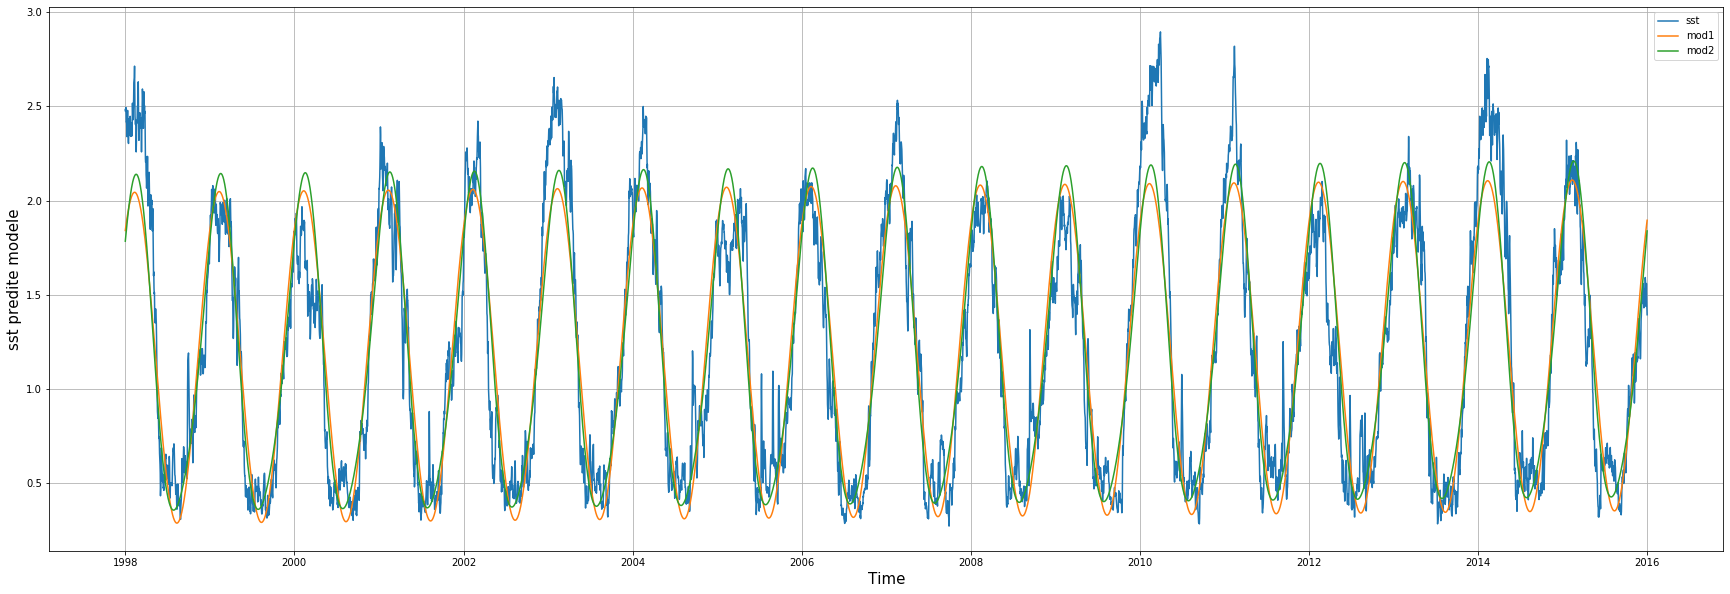

In [0]:
figure(figsize=(30,10))

plot_ts(jours,sst_std, '-', 'variance de la sst' )
plot_ts(jours,sst_prdit, '-', 'sst predite modele' )
plot_ts(jours,sst_predit2, '-', 'sst predite modele' )
plt.legend(['sst','mod1','mod2'])



*   Utlisation de la différence d'ecarts type de la Température







In [0]:
difsst_std = np.diff(sst_std)

In [0]:
sst_std

time
729390.0    2.482682
729391.0    2.472875
729392.0    2.486625
729393.0    2.493092
729394.0    2.417565
              ...   
735959.0    1.500847
735960.0    1.560348
735961.0    1.482935
735962.0    1.436012
735963.0    1.394604
Name: sst, Length: 6574, dtype: float64

In [0]:
t_fit = np.array(jours)[1:]

x1 = np.ones(t_fit.shape[0])
# define a non-linear trend
x2 = t_fit
# define a seasonal cycle
x3 = np.sin(2*np.pi*t_fit/365.25)
# define a linear trend
x4 = np.cos(2*np.pi*t_fit/365.25)
x5 = x3*x4

from sklearn.linear_model import LinearRegression
X = np.vstack((x1,x2,x3,x4,x5)).T
y=np.array(difsst_std)

# 2: create the model, as before
model = LinearRegression()

# 3: fit the model, as before
model.fit(X,y)
sst_predict = model.predict(X)

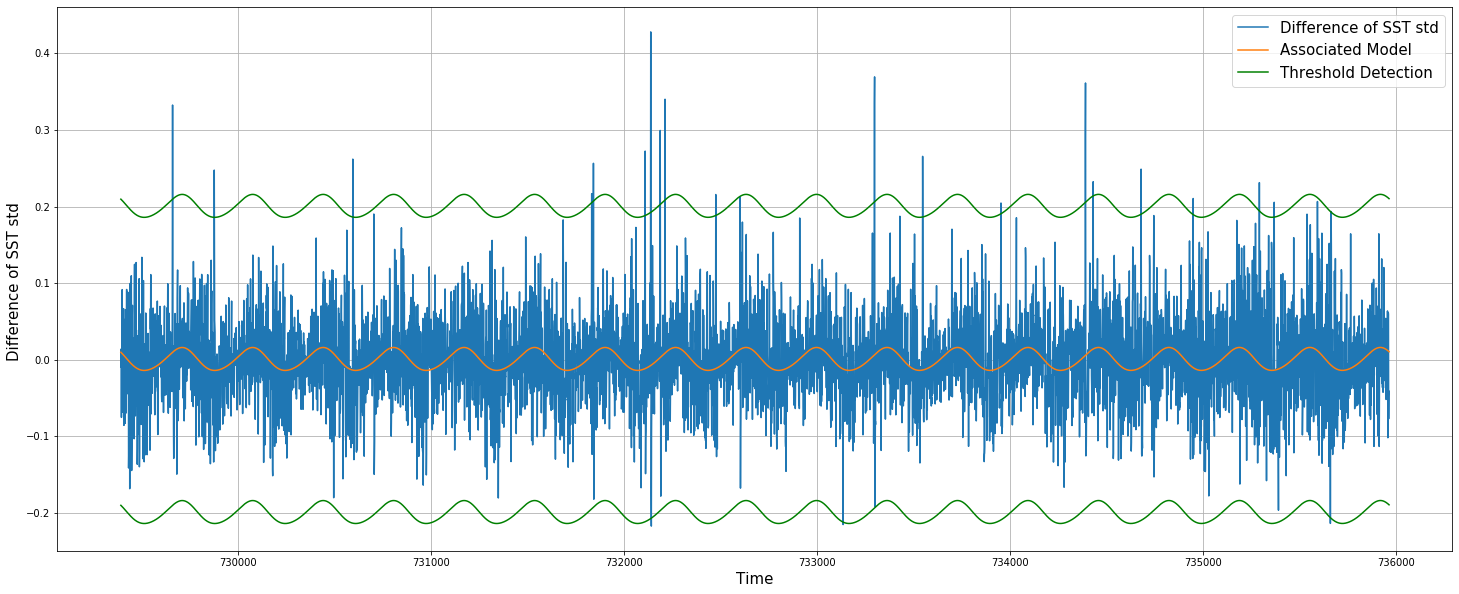

In [0]:
figure(figsize=(25,10))
plot(jours.values[1:],difsst_std , '-')
plot(jours.values[1:],sst_predict , '-')
plot(jours.values[1:],0.2+sst_predict,color ='g')
plot(jours.values[1:],-0.2+sst_predict,color= 'g')

legend(['Difference of SST std', 'Associated Model','Threshold Detection'],fontsize =15)
xlabel('Time', fontsize =15)
ylabel('Difference of SST std ',fontsize =15)
grid()

In [0]:

ouragans = []
for i in range(len(difsst_std)):
  if abs(difsst_std[i]+ sst_predict[i]) > 0.2:
    ouragans.append(i)
time_ouragans=[]
for i in ouragans:
  time_ouragans.append(jours.values[i])

Ouragans=[]
for i in range(1,len(time_ouragans)):
  if time_ouragans[i]-time_ouragans[i-1]>7:
    Ouragans.append(time_ouragans[i-1])



###Détermination du nombre d'ouragans par an

In [0]:

Ouragans_df= pd.Series(Ouragans)
Ouragan_date = Ouragans_df.apply(lambda x: datetime.date.fromordinal(int(x)).strftime("%d/%m/%y"))

In [0]:
Ouragan_date

0     26/09/98
1     30/04/99
2     17/04/01
3     15/09/04
4     10/06/05
5     12/07/05
6     27/08/05
7     21/09/05
8     11/06/06
9     15/10/06
10    01/04/08
11    11/09/08
12    18/05/09
13    09/09/11
14    19/10/11
15    23/06/12
16    26/02/14
17    05/06/14
18    31/10/14
19    24/12/14
dtype: object

In [0]:
Count_ouragans_year = Ouragans_df.apply(lambda x: datetime.date.fromordinal(int(x)).year)

In [0]:
Count_ouragans_year

0     1998
1     1999
2     2001
3     2004
4     2005
5     2005
6     2005
7     2005
8     2006
9     2006
10    2008
11    2008
12    2009
13    2011
14    2011
15    2012
16    2014
17    2014
18    2014
19    2014
dtype: int64

In [0]:
from collections import Counter 
count_ocur = Counter(list(Count_ouragans_year))
count_ocur

from pandas import DataFrame
Count_Ouragan_Year = DataFrame(list(count_ocur.items()),columns = ['year','Ourg_count']) 
Count_Ouragan_Year


,year,Ourg_count
0,1998,1
1,1999,1
2,2001,1
3,2004,1
4,2005,4
5,2006,2
6,2008,2
7,2009,1
8,2011,2
9,2012,1


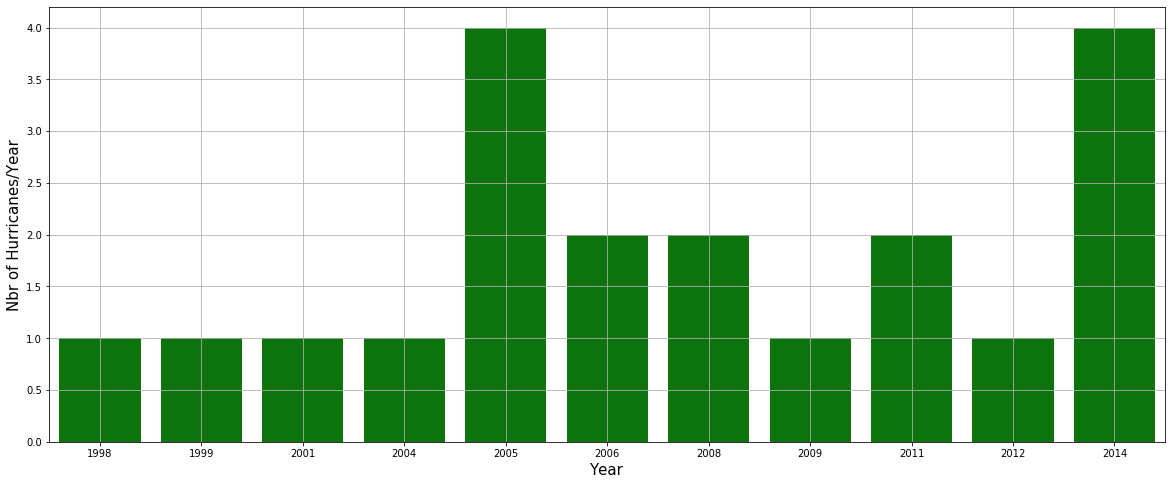

In [0]:
figure(figsize =(20,8))
sns.barplot(Count_Ouragan_Year['year'].values,Count_Ouragan_Year['Ourg_count'].values, color='g',saturation=0.8)
xlabel('Year',fontsize = 15)
ylabel('Nbr of Hurricanes/Year',fontsize= 15)
grid()

## Etude Ouragan 2005

In [0]:
from datetime import datetime as dt
d = dt.strptime('2005-07-20', '%Y-%m-%d').date()
debut_aout_2005 = d.toordinal()
jours_arr = list(jours)
debut_aout_2005_index = jours_arr.index(debut_aout_2005)
difsst_aout_2005 = difsst[debut_aout_2005_index:debut_aout_2005_index+70]


In [0]:
from sklearn.preprocessing import StandardScaler
SST = difsst_aout_2005[np.newaxis].T
scaler = StandardScaler()
scaler = scaler.fit(SST)
SST_norm = scaler.transform(SST)

In [0]:
# Clustering with GMM:

classifier = GMM(n_components=2)
classifier = classifier.fit(SST_norm)

labels = classifier.predict(SST_norm)
n_clusters = np.unique(labels).shape[0]
classifier.means_
classifier.weights_
classifier.covariances_

for k in range(n_clusters):
    print("Cluster %i mean(std), weight: %0.2f (%0.2f), %0.2f"%(k, 
                                                                classifier.means_[k,0], 
                                                                classifier.covariances_[k,0],
                                                                classifier.weights_[k]))
print(np.sum(classifier.weights_)) 

Cluster 0 mean(std), weight: 0.22 (0.36), 0.92
Cluster 1 mean(std), weight: -2.65 (1.30), 0.08
1.0000000000000004


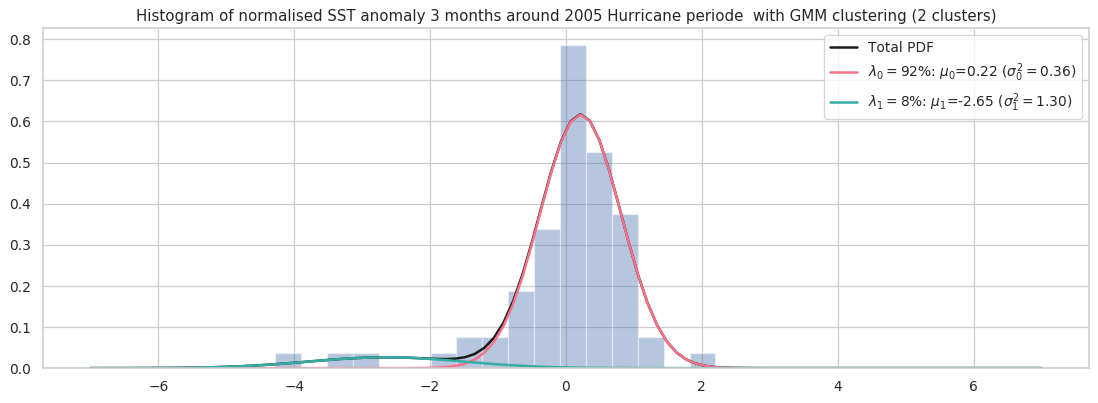

In [0]:
x = np.linspace(-7,7,100)

gmm_pdf = np.zeros(x.shape)    #black curve

for k in range(n_clusters):
    gmm_pdf += classifier.weights_[k]*gaussian(x, 
                                               classifier.means_[k,0], 
                                               classifier.covariances_[k,0]) 
import seaborn as sns
sns.set(context="notebook", style="whitegrid", palette="deep", color_codes=True)
colors = sns.husl_palette(n_clusters)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,5), dpi=90)

ax = sns.distplot(SST_norm,norm_hist= True, kde=False, ax=ax)

ax.set_title('Histogram of normalised SST anomaly 3 months around 2005 Hurricane periode  with GMM clustering (%i clusters)'%n_clusters)

plot(x,gmm_pdf,'k', linewidth=2, label = 'Total PDF')

for k, col in zip(range(n_clusters),colors):

    plt.plot(x,classifier.weights_[k]*
             gaussian(x, classifier.means_[k,0], classifier.covariances_[k,0]),\
             color=col, linewidth=2, 
             label="$\lambda_%i=%0.0f$%%: $\mu_%i$=%0.2f ($\sigma^2_%i=%0.2f$)"%(k, 
                                                    classifier.weights_[k]*100, k, 
                                                    classifier.means_[k,0], k, 
                                                    classifier.covariances_[k,0]))
legend()

*   Periode d'apparition des ouragans 




In [0]:
debut_2005 = dt.strptime('2005-01-01', '%Y-%m-%d').date()
debut_2008 = dt.strptime('2008-01-01', '%Y-%m-%d').date()
debut_2011 = dt.strptime('2011-01-01', '%Y-%m-%d').date()

debut_2005_date = debut_2005.toordinal()
debut_2008_date = debut_2008.toordinal()
debut_2011_date = debut_2011.toordinal()

In [0]:
debut_2005_index = jours_arr.index(debut_2005_date)
debut_2008_index = jours_arr.index(debut_2008_date)
debut_2011_index = jours_arr.index(debut_2011_date)

difsst_2005 = difsst[debut_2005_index:debut_2005_index+365]
difsst_2008 = difsst[debut_2008_index:debut_2008_index+365]
difsst_2011 = difsst[debut_2011_index:debut_2011_index+365]

date_2005 = pd.Series(jours_arr[debut_2005_index:debut_2005_index+365])
date_2008 = pd.Series(jours_arr[debut_2008_index:debut_2008_index+365])
date_2011 = pd.Series(jours_arr[debut_2011_index:debut_2011_index+365])

date_2005_ord = date_2005.apply(lambda x: datetime.date.fromordinal(int(x)).strftime("%d/%m"))


Text(0.5, 1.0, 'Periode of Hurricanes/year')

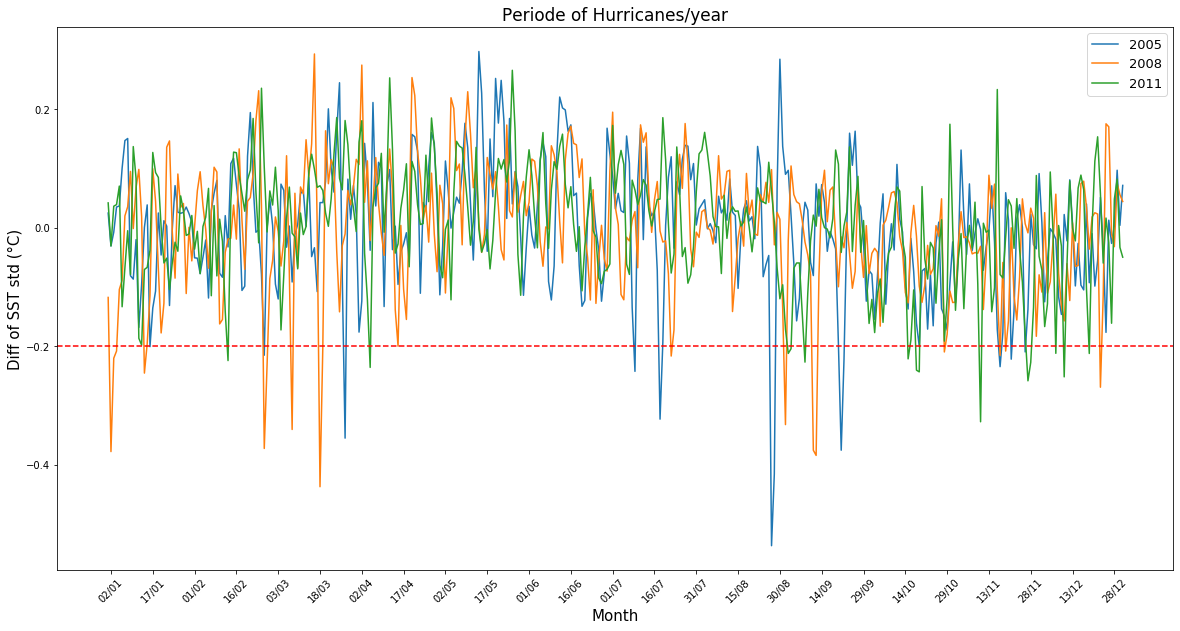

In [0]:
figure(figsize=(20,10))
axes = pyplot.gca() 
axes.xaxis.set_ticks(arange(1,365,15))
plot(date_2005_ord,difsst_2005)
plot(date_2005_ord,difsst_2008)
plot(date_2005_ord,difsst_2011)


xticks(rotation=45)
xlabel('Month',size =15)
ylabel('Diff of SST std (°C)',size =15)
axhline(y=-0.2, color ='r',linestyle='--')
legend(['2005','2008','2011'],fontsize =13)

title ('Periode of Hurricanes/year', Fontsize = 17)



*  SSH et SST corrélation (Ouragan 2005) 



In [0]:
Data_sort

,Unnamed: 0,lat,lon,sst,time,ssh,year,month
10502243,10502243,20.625,268.375,23.70,729390.0,0.2602,1998,01/98
677800,677800,27.875,266.125,19.50,729390.0,0.1128,1998,01/98
677801,677801,29.125,272.875,19.50,729390.0,0.1513,1998,01/98
677802,677802,22.875,263.875,22.50,729390.0,0.1337,1998,01/98
677803,677803,22.875,264.375,22.50,729390.0,0.2033,1998,01/98
...,...,...,...,...,...,...,...,...
8073556,8073556,26.375,275.375,27.75,735963.0,0.5989,2015,12/15
8073557,8073557,25.125,269.125,25.20,735963.0,0.3882,2015,12/15
8073558,8073558,25.875,270.875,25.20,735963.0,0.2104,2015,12/15
8073560,8073560,19.375,276.125,28.20,735963.0,0.9510,2015,12/15


In [0]:
ssh =  Data_sort.groupby(['time'])['ssh'].mean()
difssh = np.diff(ssh)

In [0]:
difssh_2005 = difssh[debut_aout_2005_index:debut_aout_2005_index+70]
difssh_2005_t = difssh_2005[np.newaxis].T

scaler_ssh = StandardScaler()
scaler_ssh = scaler_ssh.fit(difssh_2005_t)
difssh_2005_norm = scaler_ssh.transform(difssh_2005_t)

In [0]:
classifier_ssh = GMM(n_components=1)
classifier_ssh = classifier_ssh.fit(difssh_2005_norm)

labels_ssh = classifier_ssh.predict(difssh_2005_norm)
n_clusters_ssh = np.unique(labels_ssh).shape[0]
classifier_ssh.means_
classifier_ssh.weights_
classifier_ssh.covariances_

for k in range(n_clusters_ssh):
    print("Cluster %i mean(std), weight: %0.2f (%0.2f), %0.2f"%(k, 
                                                                classifier_ssh.means_[k,0], 
                                                                classifier_ssh.covariances_[k,0],
                                                                classifier_ssh.weights_[k]))
print(np.sum(classifier_ssh.weights_)) 

Cluster 0 mean(std), weight: -0.00 (1.00), 1.00
1.0


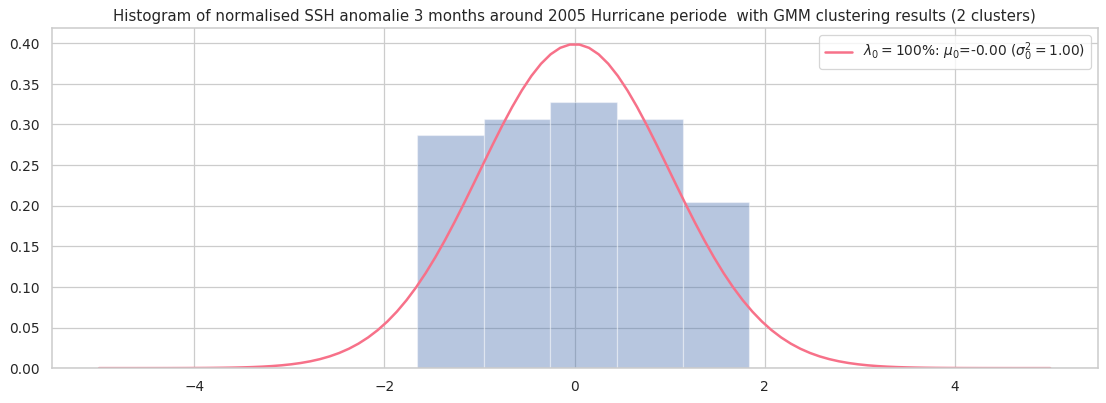

In [0]:
x1 =  np.linspace(-5,5,100)
gmm_pdf_ssh = np.zeros(x1.shape)    #black curve

for k in range(n_clusters_ssh):
    gmm_pdf_ssh += classifier_ssh.weights_[k]*gaussian(x, 
                                               classifier_ssh.means_[k,0], 
                                               classifier_ssh.covariances_[k,0]) 


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,5), dpi=90)

ax = sns.distplot(difssh_2005_norm,norm_hist= True, kde=False, ax=ax)

ax.set_title('Histogram of normalised SSH anomalie 3 months around 2005 Hurricane periode  with GMM clustering results (%i clusters)'%n_clusters)

#plot(x1,gmm_pdf_ssh,'k', linewidth=2, label = 'Total PDF')

for k, col in zip(range(n_clusters_ssh),colors):

    plt.plot(x1,classifier_ssh.weights_[k]*
             gaussian(x1, classifier_ssh.means_[k,0], classifier_ssh.covariances_[k,0]),\
             color=col, linewidth=2,\
             label="$\lambda_%i=%0.0f$%%: $\mu_%i$=%0.2f ($\sigma^2_%i=%0.2f$)"%(k, 
                                                    classifier_ssh.weights_[k]*100, k, 
                                                    classifier_ssh.means_[k,0], k, 
                                                    classifier_ssh.covariances_[k,0]))
legend()

Text(0, 0.5, 'Diff of SSH std')

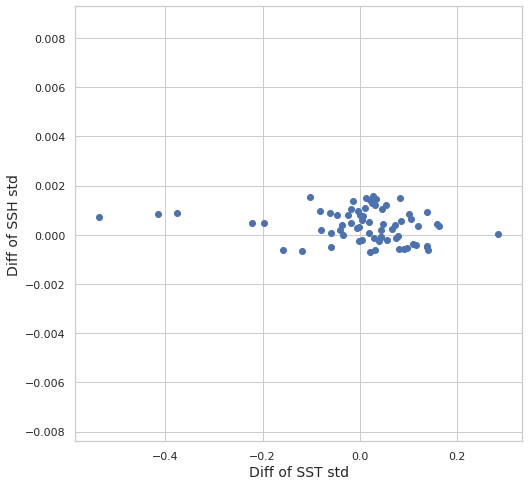

In [0]:
figure(figsize =(8,8))
scatter(difsst_aout_2005,difssh_2005)
xlabel('Diff of SST std',fontsize =14)
ylabel('Diff of SSH std',fontsize =14)

No handles with labels found to put in legend.


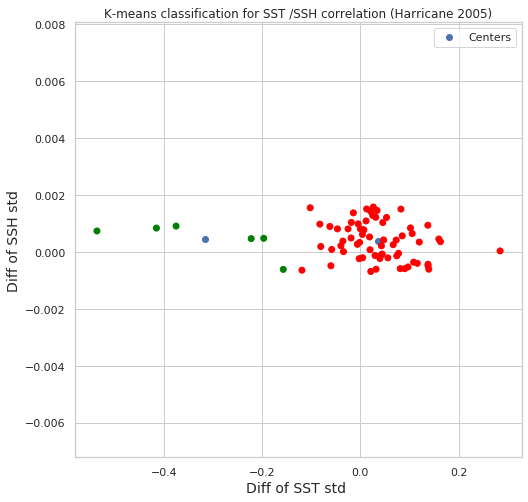

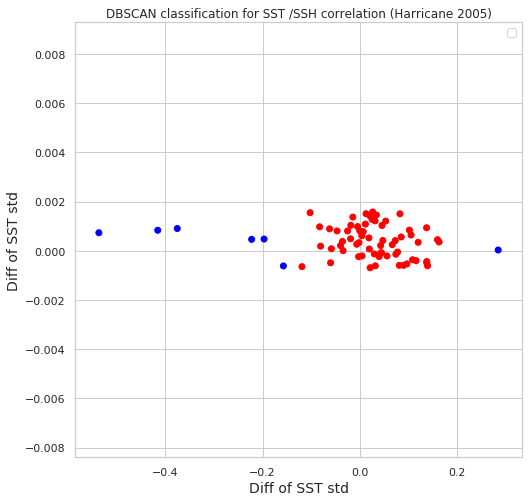

In [0]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

kmeans = KMeans(n_clusters=2)
dbscan = DBSCAN(0.03,4)


data_km = DataFrame(difsst_aout_2005,columns = ['sst']) 
data_km['ssh'] = difssh_2005

kmeans.fit(data_km)
dbscan.fit(data_km)
y_kmeans = kmeans.predict(data_km)
y_dbscan = dbscan.fit_predict(data_km)
labels = kmeans.labels_
labels_db = dbscan.labels_
colormap=np.array(['Red','green','blue'])

centers = kmeans.cluster_centers_

figure(figsize =(8,8))
scatter(centers[:, 0], centers[:, 1], c='b', label ='Centers')
scatter(data_km.sst.values,data_km.ssh, c=colormap[labels])

xlabel('Diff of SST std ', fontsize =14)
ylabel('Diff of SSH std', fontsize =14)
title('K-means classification for SST /SSH correlation (Harricane 2005)')
legend()
figure(figsize =(8,8))
scatter(data_km.sst.values,data_km.ssh, c=colormap[labels_db])
xlabel('Diff of SST std', fontsize =14)
ylabel('Diff of SST std', fontsize =14)
title('DBSCAN classification for SST /SSH correlation (Harricane 2005)')
legend()

## Trajectoires 

katrina

In [0]:
min_by_time = Data.groupby(['time'])['sst'].min()

In [0]:

d = dt.strptime('2005-08-27', '%Y-%m-%d').date()
debut_aout_2005 = d.toordinal()
jours_arr = list(jours)
debut_aout_2005_index = jours_arr.index(debut_aout_2005)
jours_kat = jours_arr[debut_aout_2005_index:debut_aout_2005_index+5]
min_by_time= list(min_by_time)
min_by_time_kat=min_by_time[debut_aout_2005_index:debut_aout_2005_index+5]


In [0]:
X2005=[]
Y2005=[]
for i in range(len(jours_kat)):
  t = Data_sort['time']==jours_kat[i]
  SST = Data_sort['sst']==min_by_time_kat[i]
  X2005.append(Data_sort[t & SST]['lon'].mean())
  Y2005.append(Data_sort[t & SST]['lat'].mean())
m=Basemap(projection='merc',llcrnrlat=20,urcrnrlat=32,\
                llcrnrlon=260,urcrnrlon=280,lat_0=(32+20)*0.5,\
                lon_0=(260+280)*0.5,resolution='l')
x2005,y2005=m(X2005,Y2005)

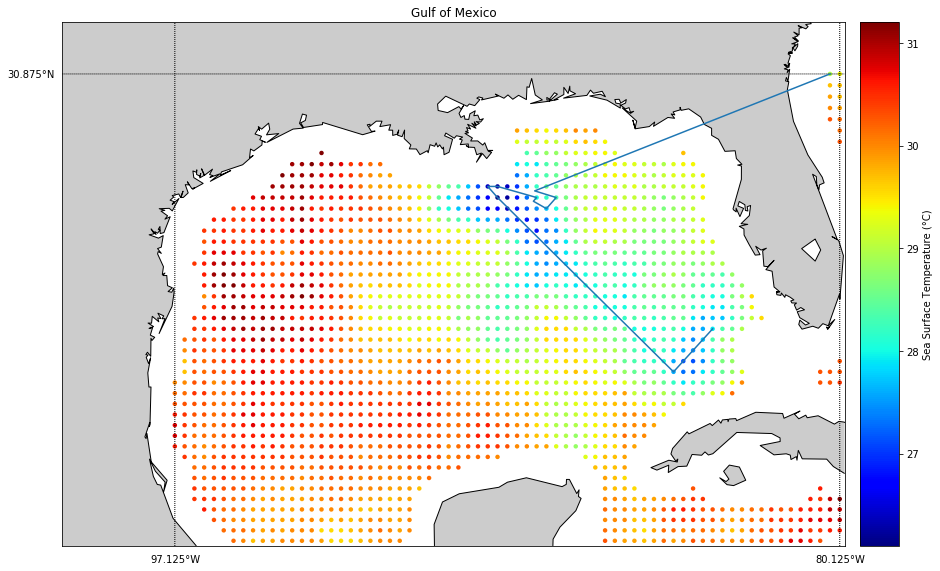

In [0]:

t = Data['time']==jours_arr[debut_aout_2005_index+4]
lat = Data[t].groupby(['lat','lon'])['lat'].mean()
lon = Data[t].groupby(['lat','lon'])['lon'].mean()
mean_sst = Data[t].groupby(['lat','lon'])['sst'].mean()
figure()
title ("Gulf of Mexico")
plot_im(lon,lat,mean_sst,20,'Sea Surface Temperature (°C)')
plt.plot(x2005,y2005)

Autres Ouragans

In [0]:
d = dt.strptime('2011-09-09', '%Y-%m-%d').date()
debut_ouragan = d.toordinal()
#jours_arr = list(jours)
debut_ouragan_index = jours_arr.index(debut_ouragan)
jours_ouragan = jours_arr[debut_ouragan_index:debut_ouragan_index+15]
#min_by_time= list(min_by_time)
min_by_time_ouragan=min_by_time[debut_ouragan_index:debut_ouragan_index+15]
X2011=[]
Y2011=[]
for i in range(len(jours_ouragan)):
  t = Data_sort['time']==jours_ouragan[i]
  SST = Data_sort['sst']==min_by_time_ouragan[i]
  X2011.append(Data_sort[t & SST]['lon'].mean())
  Y2011.append(Data_sort[t & SST]['lat'].mean())
x2011,y2011=m(X2011,Y2011)



In [0]:
d = dt.strptime('1998-09-26', '%Y-%m-%d').date()
debut_ouragan = d.toordinal()
#jours_arr = list(jours)
debut_ouragan_index = jours_arr.index(debut_ouragan)
jours_ouragan = jours_arr[debut_ouragan_index:debut_ouragan_index+15]
#min_by_time= list(min_by_time)
min_by_time_ouragan=min_by_time[debut_ouragan_index:debut_ouragan_index+15]
X98=[]
Y98=[]
for i in range(len(jours_ouragan)):
  t = Data_sort['time']==jours_ouragan[i]
  SST = Data_sort['sst']==min_by_time_ouragan[i]
  X98.append(Data_sort[t & SST]['lon'].mean())
  Y98.append(Data_sort[t & SST]['lat'].mean())
x98,y98=m(X98,Y98)

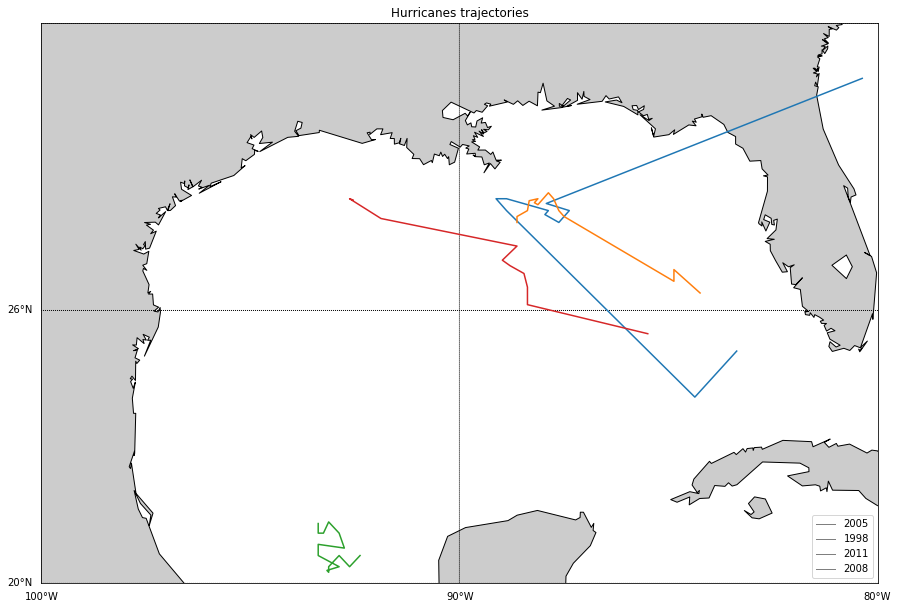

In [0]:
m=Basemap(projection='merc',llcrnrlat=20,urcrnrlat=32,\
                llcrnrlon=260,urcrnrlon=280,lat_0=(32+20)*0.5,\
                lon_0=(260+280)*0.5,resolution='l')

m.drawcoastlines()
m.fillcontinents()
parallels = linspace(20,32,3)
meridians = linspace(260,280,3)

m.drawparallels(parallels,labels=[1,0,0,1],fontsize=10)
m.drawmeridians(meridians,labels=[1,0,0,1],fontsize=10)
x2005,y2005=m(X2005,Y2005)

plt.plot(x2005,y2005)
plt.plot(x98,y98)
plt.plot(x2011,y2011)
plt.plot(x2008,y2008)
plt.title('Hurricanes trajectories')
legend(['2005','1998','2011','2008'],loc=4)

On affiche sur cette carte la trajectoire de plusieurs ouragans qu'on a détecté grâce à notre seuil. On se rend compte que que la trajectoire verte n'est pas un Ouragan mais le résultat d'un autre phénomène.

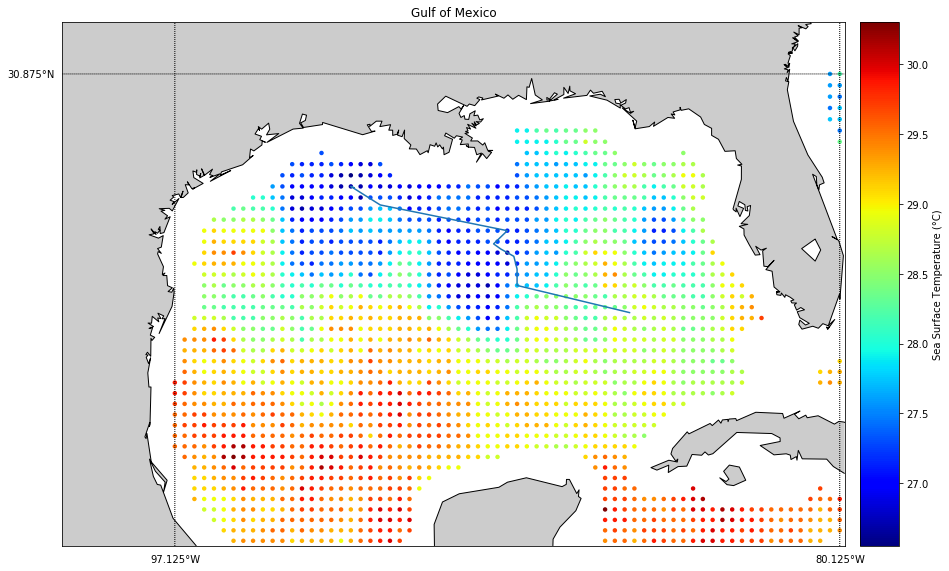

In [0]:
d = dt.strptime('2008-09-11', '%Y-%m-%d').date()
debut_ouragan = d.toordinal()
#jours_arr = list(jours)
debut_ouragan_index = jours_arr.index(debut_ouragan)
jours_ouragan = jours_arr[debut_ouragan_index:debut_ouragan_index+10]
#min_by_time= list(min_by_time)
min_by_time_ouragan=min_by_time[debut_ouragan_index:debut_ouragan_index+10]
X2008=[]
Y2008=[]
for i in range(len(jours_ouragan)):
  t = Data_sort['time']==jours_ouragan[i]
  SST = Data_sort['sst']==min_by_time_ouragan[i]
  X2008.append(Data_sort[t & SST]['lon'].mean())
  Y2008.append(Data_sort[t & SST]['lat'].mean())
x2008,y2008=m(X2008,Y2008)

# on affiche la température à un temps t que l'on peut faire varier pour vérifier que la trace de temperature suit bien la trajectoire de l'ouragan
# on se sert des images pour chaque temps pour faire une animation 
t = Data['time']==jours_arr[debut_ouragan_index+12]
lat = Data[t].groupby(['lat','lon'])['lat'].mean()
lon = Data[t].groupby(['lat','lon'])['lon'].mean()
mean_sst = Data[t].groupby(['lat','lon'])['sst'].mean()
figure()
title ("Gulf of Mexico")
plot_im(lon,lat,mean_sst,20,'Sea Surface Temperature (°C)')
plt.plot(x2008,y2008)


### Creation d'un gif

In [0]:
!pip install imageio

In [0]:
import imageio
images = []
filenames = ['image1.png', 'image2.png', 'image3.png', 'image4.png', 'image5.png', 'image6.png', 'image7.png','image8.png', 'image9.png']
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave('/content/drive/My Drive/movie.gif', images)